# ✅ Library

In [160]:
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn as sns
import ipywidgets as ip
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import arff
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, ElasticNetCV, RidgeCV
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.model_selection import cross_val_score, cross_val_predict

# ✅ Mount Data

In [161]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
# Path to the CSV file on Google Drive
arff_file_path = '/content/drive/My Drive/Magister/Semester 3/ML/Dataset ARFF/cpu.arff'
data = arff.loadarff(arff_file_path)
df = pd.DataFrame(data[0])
df.head()

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,b'adviser',125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
2,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
3,b'amdahl',29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
4,b'amdahl',29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


In [163]:
df.columns

Index(['vendor', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'class'], dtype='object')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vendor  209 non-null    object 
 1   MYCT    209 non-null    float64
 2   MMIN    209 non-null    float64
 3   MMAX    209 non-null    float64
 4   CACH    209 non-null    float64
 5   CHMIN   209 non-null    float64
 6   CHMAX   209 non-null    float64
 7   class   209 non-null    float64
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


# ✅ Correlation

In [165]:
df = df.drop(columns=['vendor'])

[Text(0, 0.5, 'MYCT'),
 Text(0, 1.5, 'MMIN'),
 Text(0, 2.5, 'MMAX'),
 Text(0, 3.5, 'CACH'),
 Text(0, 4.5, 'CHMIN'),
 Text(0, 5.5, 'CHMAX'),
 Text(0, 6.5, 'class')]

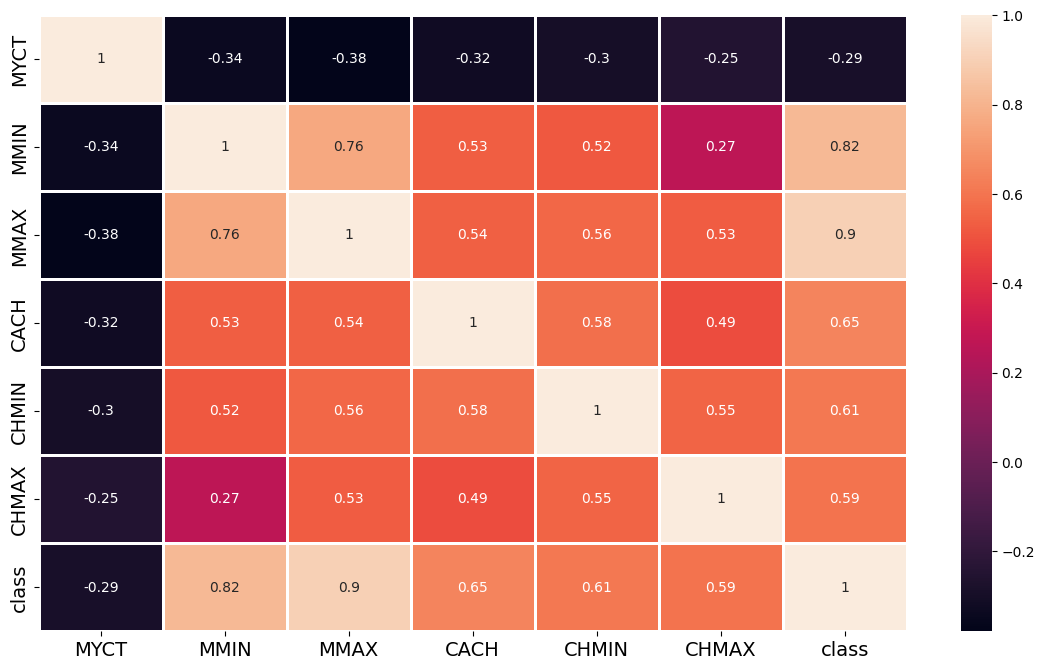

In [166]:
df_corr = df.corr()
fix, ax = plt.subplots(figsize=(14,8))
ax = sns.heatmap(df_corr, annot=True, linewidths=2, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.xaxis.get_ticklabels(), fontsize=14)

# ✅ Standardization

In [167]:
target = 'class'
# select all columns except the target
vars_cols = [x for x in df.columns if x != target]
vars_cols

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [168]:
df_scaled = pd.DataFrame()
df_scaled[vars_cols] = (df[vars_cols] - df[vars_cols].mean()) / df[vars_cols].std()
df_scaled.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899
1,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
2,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
3,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
4,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238


In [169]:
df[target].value_counts()

class
28.0     9
20.0     8
24.0     7
41.0     6
34.0     6
        ..
65.0     1
101.0    1
116.0    1
128.0    1
978.0    1
Name: count, Length: 104, dtype: int64

In [170]:
df_scaled

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899
1,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
2,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
3,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211
4,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238
...,...,...,...,...,...,...
204,-0.306701,-0.481594,-0.323723,-0.620392,-0.542608,-0.394962
205,-0.406600,-0.481594,-0.323723,0.167228,-0.395900,-0.394962
206,-0.302859,-0.223779,-0.323723,-0.620392,-0.395900,-0.164169
207,1.061146,-0.607408,-0.323723,0.167228,-0.689316,-0.702686


# ✅ Lasso

In [171]:
X = df_scaled
y = df[target]

In [172]:
def lasso_coefs(X, y, alphas):
  coefs = []
  lasso_reg = Lasso()
  for a in alphas:
    lasso_reg.set_params(alpha = a)
    lasso_reg.fit(X, y)
    coefs.append(lasso_reg.coef_)
  return coefs

In [173]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
features = X; target = y
l_coefs = lasso_coefs(features, target, l_alphas)

In [174]:
def coefficients_plotter(alphas, coefs, feature_names,
                         upperbound_alpha, regtype
                         ):
  amin = np.min(alphas)
  amax = np.max(alphas)
  alphas = [a for a in alphas if a <= upperbound_alpha]
  coefs = coefs[0:len(alphas)]
  colors = sns.color_palette(palette="colorblind", n_colors=len(coefs[0]))
  fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,4))
  ax1.axvline(upperbound_alpha, lw=2, ls='--', c='r', alpha=0.3)
  ax1.plot(alphas, coefs, lw=2)
  if regtype.lower() == 'ridge': ax1.set_xscale('log')
  ax1.set_xlim([amin,amax])
  ax1.set_xlabel('alpha',fontsize=14)
  ax1.set_title(regtype+' coefficient paths\n', fontsize=14)

  ax2.bar(x=list(range(1, len(feature_names)+1)),
          height=coefs[-1], align='center', color=colors)
  ax2.set_xticks(list(range(1, len(feature_names)+1)))
  ax2.set_xticklabels(feature_names, rotation=90, fontsize=12)
  ax2.set_title(regtype+ ' feature coefficients \nalpha = '+
                str(round(upperbound_alpha,2)), fontsize=14)
  ax2.set_xlabel('Feature name', fontsize=14)
  plt.tight_layout()
  plt.show()

In [195]:
def visualize_lasso_plots(alpha = 0):
  coefficients_plotter(alphas = l_alphas, coefs = l_coefs,
                       feature_names = features.columns,
                       upperbound_alpha = alpha,
                       regtype = 'Lasso'
                       )
interact(visualize_lasso_plots, alpha = (0.001, 0.2, 0.0025))

interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.2, min=0.001, step=0.0025), Output()…

<function __main__.visualize_lasso_plots(alpha=0)>

# ✅ Ridge

In [176]:
r_alphas = np.logspace(start = 0, stop = 5, num = 200)
print("The range of alphas to be tested is between: {} and {}". format(min(r_alphas), max(r_alphas)))

The range of alphas to be tested is between: 1.0 and 100000.0


In [177]:
def ridge_coefficients(X, y, alphas):
  coefs = []
  ridge_reg = Ridge()
  for a in alphas:
    ridge_reg.set_params(alpha=a)
    ridge_reg.fit(X,y)
    coefs.append(ridge_reg.coef_)
  return coefs

In [178]:
r_coefs = ridge_coefficients(features, target, r_alphas)

In [179]:
def visualize_ridge_plots(log_of_alpha = 0):
  coefficients_plotter(alphas = r_alphas, coefs = r_coefs,
                       feature_names = features.columns,
                       upperbound_alpha = 10**log_of_alpha,
                       regtype = 'Ridge'
                       )
interact(visualize_ridge_plots, alpha = (0.000001, 5.0, 0.05))

interactive(children=(IntSlider(value=0, description='log_of_alpha', max=1), Output()), _dom_classes=('widget-…

<function __main__.visualize_ridge_plots(log_of_alpha=0)>

# ✅ Elastic Net

In [180]:
def elasticnet_coefs(X, Y, alphas):
  coefs = []
  enet_reg = ElasticNet()
  for a in alphas:
    enet_reg.set_params(alpha=a, l1_ratio=0.05)
    enet_reg.fit(X,Y)
    coefs.append(enet_reg.coef_)
  return coefs

In [181]:
enet_alphas = np.arange(0.01, 1.0, 0.005)
features = X; target = y
enet_coefs = elasticnet_coefs(features, target, enet_alphas)

In [182]:
def visualize_enet_plots(alpha = 0.01):
  coefficients_plotter(alphas = enet_alphas, coefs = r_coefs,
                       feature_names = features.columns,
                       upperbound_alpha = alpha,
                       regtype = 'Elastic-Net'
                       )
interact(visualize_enet_plots, alpha = (0.0, 1.0, 0.005))

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.0, step=0.005), Output()), _dom_class…

<function __main__.visualize_enet_plots(alpha=0.01)>

# ✅ Model Performance with Complex Predictor Matrix using Regularization

## Manipulate Overfitting Dataset

In [183]:
poly = PolynomialFeatures(degree=2,
                          interaction_only=True,
                          include_bias=False
                          )
poly = poly.fit(X)
X_overfit = poly.transform(X)
poly_cols = poly.get_feature_names_out(df_scaled.columns)
X_overfit = pd.DataFrame(data = X_overfit, columns = poly_cols)
target = 'class'
y_overfit = df[target]

In [184]:
print("Shape of feature matrix X: ", X.shape)
print("Shape of feature matrix X_overfit: ", X_overfit.shape)
print("Shape of feature matrix y: ", y.shape)
print("Shape of feature matrix y_overfit: ", y_overfit.shape)

Shape of feature matrix X:  (209, 6)
Shape of feature matrix X_overfit:  (209, 21)
Shape of feature matrix y:  (209,)
Shape of feature matrix y_overfit:  (209,)


## Linear Regression without Regularization

In [185]:
lr_model = LinearRegression()
lr_cv_mean_mse = -cross_val_score(estimator = lr_model,
                                  X=X_overfit, y=y_overfit, cv=5,
                                  scoring='neg_mean_squared_error'
                                  ).mean()
lr_cv_mean_r2 = -cross_val_score(estimator = lr_model,
                                  X=X_overfit, y=y_overfit, cv=5,
                                  scoring='r2'
                                  ).mean()
print("Hasil dari LR (cv=5) tanpa regularisasi")
print("Ridge CV mean MSE: ", lr_cv_mean_mse)
print("Ridge CV mean R^2: ", lr_cv_mean_r2)

Hasil dari LR (cv=5) tanpa regularisasi
Ridge CV mean MSE:  474.6651491980741
Ridge CV mean R^2:  -0.967522617029853


## Ridge Regression Alpha = 10

In [186]:
alpha = 10.0
ridge_model = Ridge(alpha=alpha)
ridge_cv_mean_mse = -cross_val_score(estimator = ridge_model,
                                  X=X_overfit, y=y_overfit, cv=5,
                                  scoring='neg_mean_squared_error'
                                  ).mean()
ridge_cv_mean_r2 = -cross_val_score(estimator = ridge_model,
                                  X=X_overfit, y=y_overfit, cv=5,
                                  scoring='r2'
                                  ).mean()
print("Hasil dari RR (cv=5) tanpa regularisasi")
print("Ridge CV mean MSE: ", ridge_cv_mean_mse)
print("Ridge CV mean R^2: ", ridge_cv_mean_r2)

Hasil dari RR (cv=5) tanpa regularisasi
Ridge CV mean MSE:  513.8233399892003
Ridge CV mean R^2:  -0.9597241331033644


### Cari Value Alpha Terbaik

In [187]:
r_alphas_ = np.logspace(start = 0, stop = 5, num = 1000)
print("Mencari {} alpha dengan range ({},{})".format(
    len(r_alphas_), r_alphas_.min(), r_alphas.max()
))
ridge_model = RidgeCV(alphas=r_alphas_, store_cv_values=True)
ridge_model = ridge_model.fit(X_overfit, y_overfit)
ridge_optimal_alpha = ridge_model.alpha_
print("Best value alpha: {}".format(ridge_optimal_alpha))
ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_model.cv_values_.T]

Mencari 1000 alpha dengan range (1.0,100000.0)
Best value alpha: 1.0


In [188]:
def plot_cv(alphas, cv_means, optimal_alpha, lr_mse, log=False):
  fig = plt.figure(figsize=(16,6))
  ax = plt.gca()
  if log:
    ax.semilogx(alphas, cv_means, lw=3, label='alpha/s')
  else:
    ax.plot(alphas, cv_means, lw=3, label='alpha/s')
  ax.axvline(optimal_alpha, color='g', label='Optimal alpha={}'.format(optimal_alpha),
             ls='--', lw=5
             )
  ax.axhline(lr_mse, color='r', label='Regression (no regularization MSE)={}'.format(lr_mse),
             ls='--', lw=2
             )
  ax.set_xlabel('alpha/s', fontsize=16)
  ax.set_ylabel('MSE', fontsize=16)
  plt.legend()

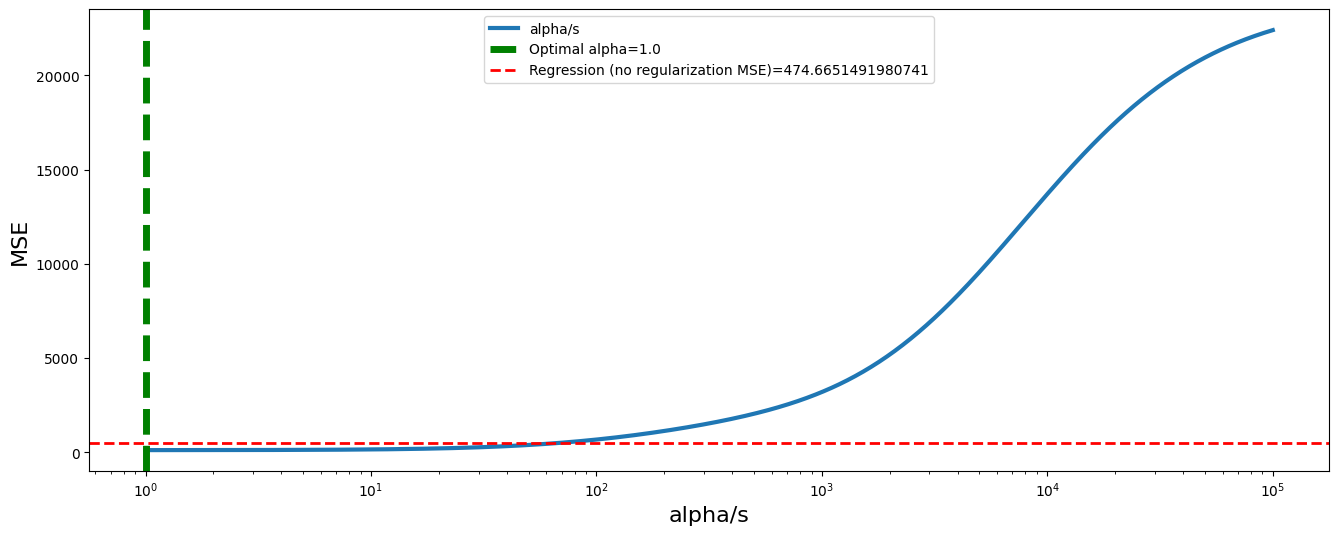

In [189]:
plot_cv(alphas=ridge_model.alphas, cv_means=ridge_cv_means, optimal_alpha=ridge_optimal_alpha, lr_mse=lr_cv_mean_mse, log=True)

## Lasso Regression

In [190]:
l_alphas_ = np.arange(0.001, 0.15, 0.001)
print("Mencari {} alpha dengan range ({},{})".format(
    len(l_alphas_), l_alphas_.min(), l_alphas_.max()
))
lasso_model = LassoCV(alphas=l_alphas_, cv=5)
lasso_model = lasso_model.fit(X_overfit, y_overfit)
lasso_optimal_alpha = lasso_model.alpha_
print("Best value alpha: {}".format(lasso_optimal_alpha))
lasso_cv_means = [np.mean(cv_alpha) for cv_alpha in lasso_model.mse_path_]

Mencari 149 alpha dengan range (0.001,0.149)
Best value alpha: 0.002


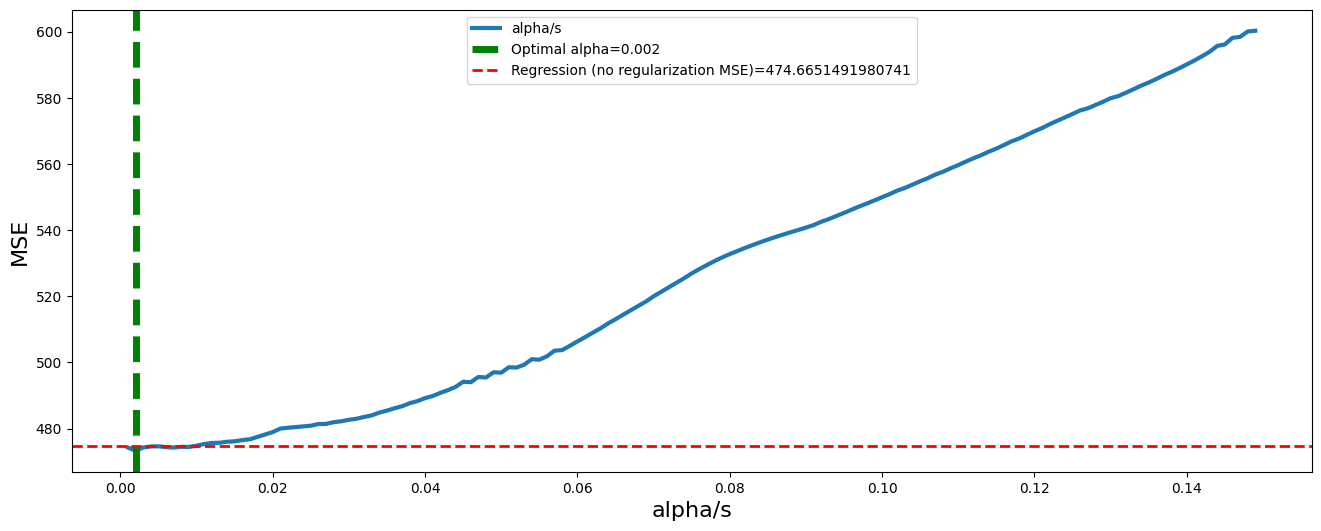

In [191]:
plot_cv(alphas=lasso_model.alphas_, cv_means=lasso_cv_means, optimal_alpha=lasso_optimal_alpha, lr_mse=lr_cv_mean_mse)

## Elastic Net

In [192]:
enet_alphas_ = np.arange(0.0001, 1.0, 0.001)
print("Mencari {} alpha dengan range ({},{})".format(
    len(enet_alphas_), enet_alphas_.min(), enet_alphas_.max()
))
l1_ratio = 0.7 # try 0.01, 0.2, 0.5, etc
enet_model = ElasticNetCV(alphas=enet_alphas_, l1_ratio=l1_ratio, cv=5)
enet_model = enet_model.fit(X_overfit, y_overfit)
enet_optimal_alpha = enet_model.alpha_
print("Best value alpha: {}".format(enet_optimal_alpha))
enet_cv_means = [np.mean(cv_alpha) for cv_alpha in enet_model.mse_path_]

Mencari 1000 alpha dengan range (0.0001,0.9991)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1437.8365064521429, tolerance: 478.31815688622754
  model = cd_fast.enet_coordinate_descent_gram(


Best value alpha: 0.0261


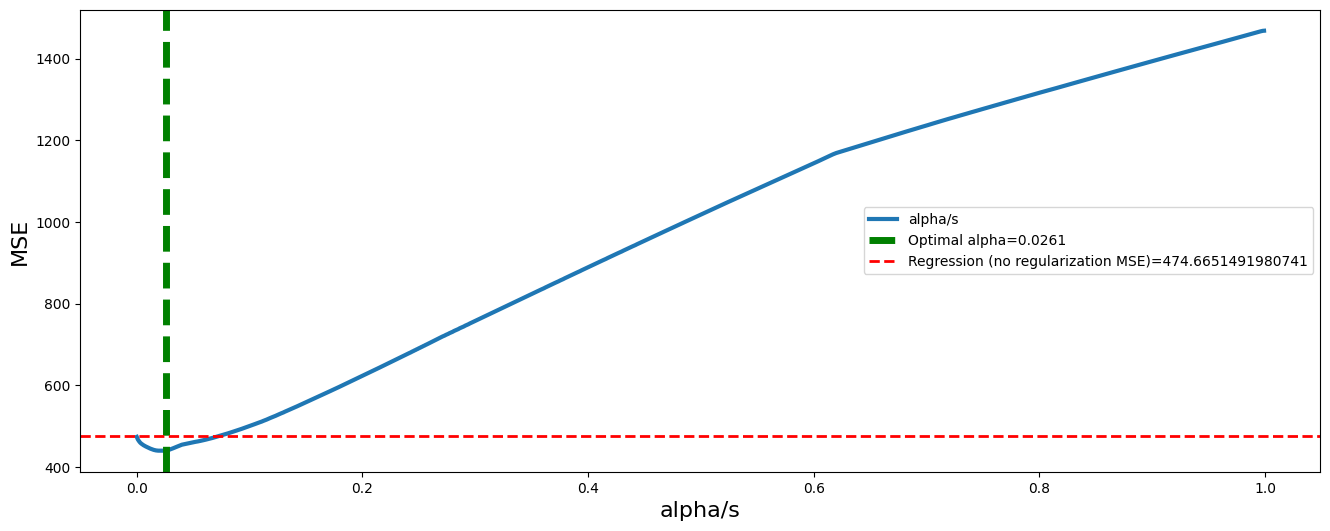

In [193]:
plot_cv(alphas=enet_model.alphas_, cv_means=enet_cv_means, optimal_alpha=enet_optimal_alpha, lr_mse=lr_cv_mean_mse)